# The $\Phi$  discs dummy version

The Power of eigenfunctions


## Golden_Ratio_and_mod_13_structure

https://www.youtube.com/watch?v=NY5tgKBtLQ0

$$ T_o  = \frac{1}{2}(1+\sqrt{5})$$

And we have as eigenfunction for the discrete time index for the selected $T_o$:

$$ \tau = e^{\frac{2\pi i}{T_o}}$$



$$\delta[0]=\delta_0 =\frac{1}{T_o}$$

$$\delta[n] =\begin{cases} \delta_0\space for \space n=0\space mod\space T_{mod} \\
                     0\space for \space n > 0 \space mod\space T_{mod} \\
       \end{cases}$$

$$r[-1]=0$$


$$r[n] = r[n-1] + \delta[n] $$


Time evolves, and becomes interested in modular shapes and in closed loops:

$$\hat n[n] =r[n]·\tau^{n}$$







In [45]:
#

In [46]:
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np


In [47]:
# 
#This one is still dummy but wont crash the pc.
#https://stackoverflow.com/questions/46460127/efficiently-finding-prime-numbers-in-python
primes_list_path='primes.csv'
# import primes list as a numpy array
primes_list=pd.read_csv(primes_list_path)
#primes_list=np.array(primes_list.values,dtype=int)
batch_size =13*2
start_index=0
#data = pd.read_csv('mod_37_cycle_data.csv')
basic_map = pd.read_csv('basic_map2.csv')
#data.set_index('n', inplace=True)
basic_map.set_index('X', inplace=True)
#S = np.array(data.S[start_index:batch_size].values)
S = np.arange(0,batch_size)



In [48]:
df=primes_list

def isPrime(N):
    if df[df.eq(N).all(1)].values !=0:
        answer =   True 
    else:
        answer =   False
            
    return answer


In [49]:
isPrime(13)

True

In [50]:
# basic animated mod 39 wheel in python
from __future__ import division 
#import glob
from PIL import Image
import re
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np 
import random
import pandas as pd
primes_list_path='primes.csv'
primes_list=pd.read_csv(primes_list_path)
df=primes_list

def isPrime(N):
    if df[df.eq(N).all(1)].values !=0:
        answer =   True 
    else:
        answer =   False
            
    return answer

allow_plot = 0
allow_scatter = 1
allow_text = 1
allow_gif = 0

To          = 39 
k_o         = 1/3
sessions    = 39

r_o=(1/4)
t_o=To*k_o
                              
batch_size  = sessions*To

#change this to the int vector representing input signal
#symbol = some_stochastic_vector
symbol      = np.zeros(batch_size,dtype=int) 

if allow_plot == 1 :
    #Init plot settings
    plt.close()
    plt.figure(figsize=(16,16))
    plt.rcParams.update({
        "lines.color": "black",
        "patch.edgecolor": "black",
        "text.color": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "black",
        "axes.labelcolor": "black",
        "xtick.color": "black",
        "ytick.color": "black",
        "grid.color": "black",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black"})
    #plt.xlabel('real alpha')
    #plt.ylabel('imaginary beta')
    #plt.title('events constellation')
    #plt.xlim(-2, 2)
    #plt.ylim(-2, 2)
    plt.gca().set_aspect('equal', adjustable='box')
    
    #Create base colormapplt.close() wheel
    hsvwheel = cm.get_cmap('hsv', To)

#Main constants
wzero = 2 * np.pi * (1/To) #Base


#Initial conditions natural information field carrier
half=1/2
root_phase=np.sqrt(5)
root_norm=np.sqrt(3)

r_phase=half*(1+root_phase)
r_norm=half*(1+1j*root_norm)



#Plot constants
base_symbol_size=13
base_text_size=13
symbol_size =base_symbol_size*np.ones(batch_size,dtype=int)
text_size =base_text_size*np.ones(batch_size,dtype=int)
dots_per_inch=300
event_marker="o"

#Variables preallocation
xphitime    = np.zeros(batch_size,dtype=float)
yphitime    = np.zeros(batch_size,dtype=float)
phitime     = np.zeros(batch_size,dtype=complex)
phisymbol   = np.zeros(batch_size,dtype=complex)
xphisymbol  = np.zeros(batch_size,dtype=float)
yphisymbol  = np.zeros(batch_size,dtype=float)
z_time_phase = np.zeros(batch_size,dtype=complex)
z_time_norm  = np.zeros(batch_size,dtype=complex)
z_time=np.zeros(batch_size,dtype=complex)
z_carrier_alpha=np.zeros(batch_size,dtype=float)
z_carrier_beta=np.zeros(batch_size,dtype=float)
z_carrier=np.zeros(batch_size,dtype=complex)

events_index   = np.arange(batch_size,dtype=int)
nmod = events_index%To


for n in events_index:
    
    # Index parametrization
    
    phitime[n]      = np.exp(1j * wzero * nmod[n] )
    xphitime[n]     = phitime[n].real 
    yphitime[n]     = phitime[n].imag 
    z_time_phase[n] = ((n+1)/r_o) * np.exp(1j * ((r_o)/r_phase) * (n+1) )
    z_time_norm[n]  = (n+1) * r_norm
    z_time[n]=z_time_norm[n]/z_time_phase[n]
    z_carrier_alpha[n]=(r_o+t_o-(half/r_o)*n)*z_time[n].real
    z_carrier_beta[n]=(r_o+t_o-(half*root_norm)*n)*z_time[n].imag
    z_carrier[n]=z_carrier_alpha[n]+1j*z_carrier_beta[n]
    
    # Symbol parametrization
    
    symbol[n]      = nmod[n] # symbols follow events index
    #symbol[n]     = input_symbols[n]    
    #symbol[n]     = random.randint(1, To) # symbols from RNG
    phisymbol[n]   = np.exp(1j * wzero * symbol[n])
    xphisymbol[n]  = phisymbol[n].real
    yphisymbol[n]  = phisymbol[n].imag

 
    if allow_plot == 1 :
        #plot current event hsvwheel phase color in index space
    
         


         
         

         if allow_scatter==1:
          if ~isPrime(n):
              plt.scatter(z_carrier_alpha[n], z_carrier_beta[n] , marker=event_marker, color=hsvwheel(symbol[n-7]), s=symbol_size[n])
              plt.scatter(z_carrier_alpha[n], (-1)*z_carrier_beta[n] , marker=event_marker, color=hsvwheel(symbol[n-6]), s=symbol_size[n])
              plt.scatter((-1)*z_carrier_alpha[n], z_carrier_beta[n] , marker=event_marker, color=hsvwheel(symbol[n-5]), s=symbol_size[n])
              plt.scatter((-1)*z_carrier_alpha[n], (-1)*z_carrier_beta[n] , marker=event_marker, color=hsvwheel(symbol[n-4]), s=symbol_size[n])
              plt.scatter(z_carrier_beta[n], z_carrier_alpha[n] , marker=event_marker, color=hsvwheel(symbol[n-3]), s=symbol_size[n])
              plt.scatter(z_carrier_beta[n], (-1)*z_carrier_alpha[n] , marker=event_marker, color=hsvwheel(symbol[n-2]), s=symbol_size[n])
              plt.scatter((-1)*z_carrier_beta[n], z_carrier_alpha[n] , marker=event_marker, color=hsvwheel(symbol[n-1]), s=symbol_size[n])
              plt.scatter((-1)*z_carrier_beta[n], (-1)*z_carrier_alpha[n] , marker=event_marker, color=hsvwheel(symbol[n]), s=symbol_size[n])
          
        
         if allow_text==1:
          if isPrime(n):
              plt.text(z_carrier_alpha[n], z_carrier_beta[n],str(n), color=hsvwheel(symbol[n-0]), size=text_size[n])
              plt.text(z_carrier_alpha[n], (-1)*z_carrier_beta[n],str(n), color=hsvwheel(symbol[n-0]), size=text_size[n])         
              plt.text((-1)*z_carrier_alpha[n], z_carrier_beta[n],str(n), color=hsvwheel(symbol[n-0]), size=text_size[n])
              plt.text((-1)*z_carrier_alpha[n], (-1)*z_carrier_beta[n],str(n), color=hsvwheel(symbol[n-0]), size=text_size[n])      
              plt.text(z_carrier_beta[n], z_carrier_alpha[n] ,str(n), color=hsvwheel(symbol[n-0]), size=text_size[n])
              plt.text(z_carrier_beta[n], (-1)*z_carrier_alpha[n] ,str(n), color=hsvwheel(symbol[n-0]), size=text_size[n])
              plt.text((-1)*z_carrier_beta[n], z_carrier_alpha[n] ,str(n), color=hsvwheel(symbol[n-0]), size=text_size[n])
              plt.text((-1)*z_carrier_beta[n],(-1)*z_carrier_alpha[n] ,str(n), color=hsvwheel(symbol[n]), size=text_size[n])
          
        
       
        
        # Save a png with current state
        #plt.savefig(f'img{n}.png',dpi=dots_per_inch)

plt.savefig(f'final.png')

<Figure size 432x288 with 0 Axes>

In [51]:
# plt.scatter(z_carrier_alpha[n], z_carrier_beta[n] , marker=event_marker, color=hsvwheel(symbol[n-7]), s=symbol_size[n])
#               plt.scatter(z_carrier_alpha[n], (-1)*z_carrier_beta[n] , marker=event_marker, color=hsvwheel(symbol[n-6]), s=symbol_size[n])
#               plt.scatter((-1)*z_carrier_alpha[n], z_carrier_beta[n] , marker=event_marker, color=hsvwheel(symbol[n-5]), s=symbol_size[n])
#               plt.scatter((-1)*z_carrier_alpha[n], (-1)*z_carrier_beta[n] , marker=event_marker, color=hsvwheel(symbol[n-4]), s=symbol_size[n])
#               plt.scatter(z_carrier_beta[n], z_carrier_alpha[n] , marker=event_marker, color=hsvwheel(symbol[n-3]), s=symbol_size[n])
#               plt.scatter(z_carrier_beta[n], (-1)*z_carrier_alpha[n] , marker=event_marker, color=hsvwheel(symbol[n-2]), s=symbol_size[n])
#               plt.scatter((-1)*z_carrier_beta[n], z_carrier_alpha[n] , marker=event_marker, color=hsvwheel(symbol[n-1]), s=symbol_size[n])
#               plt.scatter((-1)*z_carrier_beta[n], (-1)*z_carrier_alpha[n] , marker=event_marker, color=hsvwheel(symbol[n]), s=symbol_size[n])Q




import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import image

import matplotlib.animation as animation


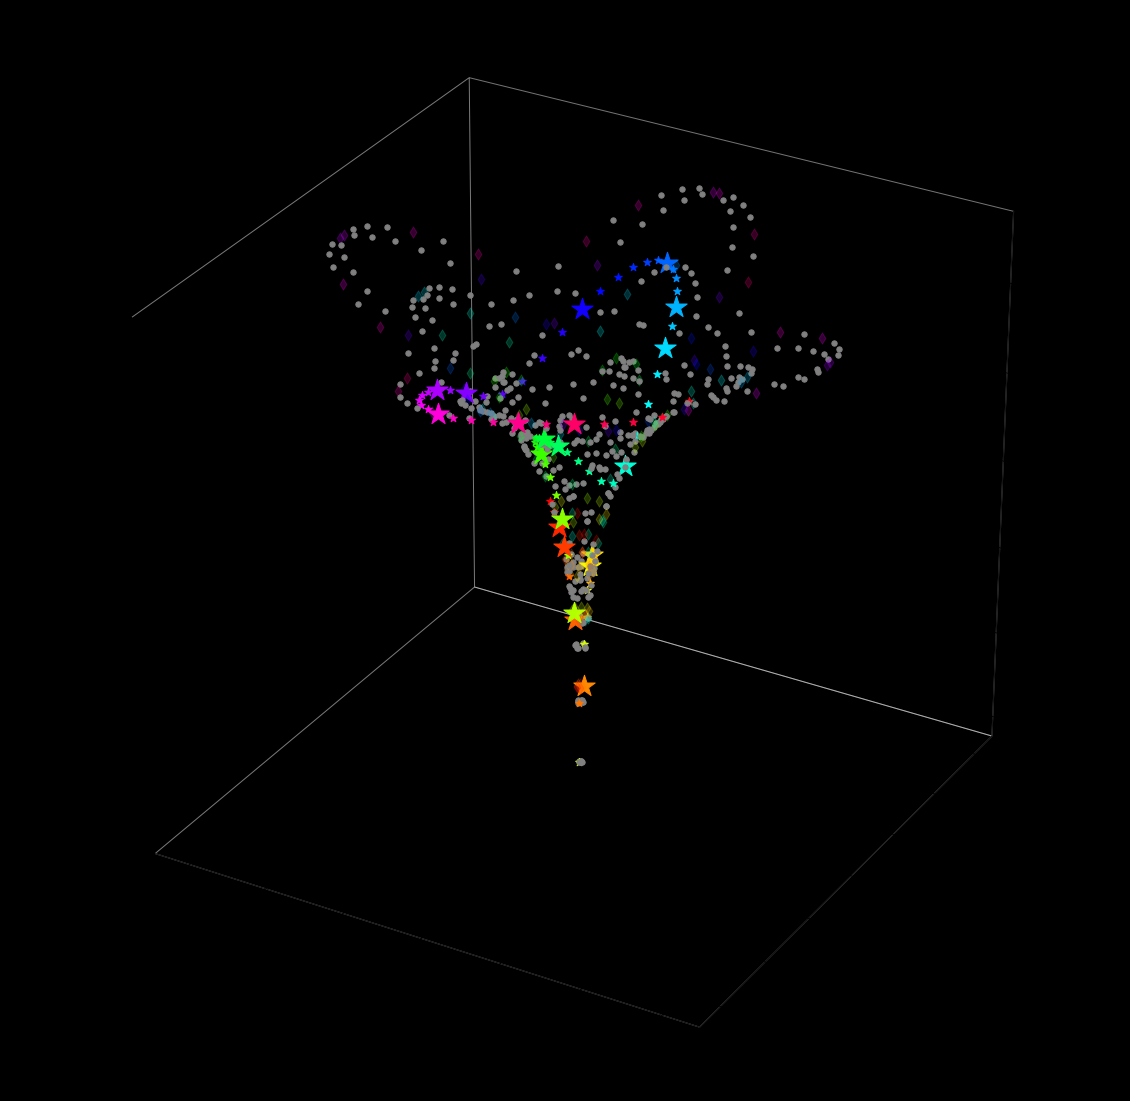

<Figure size 432x288 with 0 Axes>

In [61]:
plt.rcParams.update({
        "lines.color": "black",
        "patch.edgecolor": "black",
        "text.color": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "black",
        "axes.labelcolor": "black",
        "xtick.color": "black",
        "ytick.color": "black",
        "grid.color": "black",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black"})


fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(111, projection='3d')
#fig.set_size_inches(20, 20)
ax.grid(False)
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
plt.style.use('dark_background')
path_out='/content/drive/MyDrive/'
text='ttttest'
fps=2

ims = []

# Each index element has 8 internal parallel steps(in the same orbit) able to model different dynamics
# The size of the symbol can indicate the first/second/third different
# The color is a discrete mapping in HSV 
z_carrier_orig=z_carrier
k=-1
#z_carrier=z_carrier**(-k)
 #prime symbol size
b_size=39*2
T_color=13*6
T_mod=T_color
hsvwheel = cm.get_cmap('hsv', T_color)

nmod = events_index%T_mod
symbol=nmod
size_prime=(13)**(0.5*(1+np.sqrt(5)))
alpha_p=0.21
for n in np.arange(z_carrier[0:b_size].size):
  
  if isPrime(n):
    event_marker="d"
    size=size_prime
    #ax.scatter((-1)*z_carrier_beta[n],(-1)*z_carrier_alpha[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-0]),s=11*size,marker='*')
    ax.scatter((-1)*z_carrier_beta[n],(-1)*z_carrier_alpha[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-0]),s=8*size,marker='*')
    
    ax.scatter(z_carrier_alpha[n],z_carrier_beta[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-7]),s=size,marker=event_marker,alpha=alpha_p)
    
    ax.scatter((+1)*z_carrier_alpha[n],(-1)*z_carrier_beta[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-6]),s=size,marker=event_marker,alpha=alpha_p)
    
    ax.scatter((-1)*z_carrier_alpha[n],(+1)*z_carrier_beta[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-5]),s=size,marker=event_marker,alpha=alpha_p)
    
    ax.scatter((-1)*z_carrier_alpha[n],(-1)*z_carrier_beta[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-4]),s=size,marker=event_marker,alpha=alpha_p)
    
    ax.scatter(z_carrier_beta[n],z_carrier_alpha[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-3]),s=size,marker=event_marker,alpha=alpha_p)
    
    ax.scatter((+1)*z_carrier_beta[n],(-1)*z_carrier_alpha[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-2]),s=size,marker=event_marker,alpha=alpha_p)
    
    ax.scatter((-1)*z_carrier_beta[n],(+1)*z_carrier_alpha[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-1]),s=size,marker=event_marker,alpha=alpha_p)
    
    
    
  else:
    event_marker="o"
    size=13*2.2
    ax.scatter((-1)*z_carrier_beta[n],(-1)*z_carrier_alpha[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-0]),s=2.3*size,marker='*')
    ax.scatter(z_carrier_alpha[n],z_carrier_beta[n],np.log(np.abs(z_carrier[n])),color='gray',s=size,marker=event_marker)
    ax.scatter((+1)*z_carrier_alpha[n],(-1)*z_carrier_beta[n],np.log(np.abs(z_carrier[n])),color='gray',s=size,marker=event_marker)
    ax.scatter((-1)*z_carrier_alpha[n],(+1)*z_carrier_beta[n],np.log(np.abs(z_carrier[n])),color='gray',s=size,marker=event_marker)

    ax.scatter((-1)*z_carrier_alpha[n],(-1)*z_carrier_beta[n],np.log(np.abs(z_carrier[n])),color='gray',s=size,marker=event_marker)

    ax.scatter(z_carrier_beta[n],z_carrier_alpha[n],np.log(np.abs(z_carrier[n])),color='gray',s=size,marker=event_marker)

    ax.scatter((+1)*z_carrier_beta[n],(-1)*z_carrier_alpha[n],np.log(np.abs(z_carrier[n])),color='gray',s=size,marker=event_marker)

    ax.scatter((-1)*z_carrier_beta[n],(+1)*z_carrier_alpha[n],np.log(np.abs(z_carrier[n])),color='gray',s=size,marker=event_marker)

  #plt.savefig('/content/drive/MyDrive/4D_flower/observers_path_4D_flower_%d.png' % n)

   


plt.show()
  
plt.savefig(f'/content/drive/MyDrive/4D_flower/00000_LAST_image.png',dpi=dots_per_inch)
  



In [ ]:
#  if isPrime(n):
#     event_marker="d"
#     size=size_prime
#     ax.scatter((-1)*z_carrier_beta[n],(-1)*z_carrier_alpha[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-0]),s=11*size,marker='*')
#     ax.scatter(z_carrier_alpha[n],z_carrier_beta[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-7]),s=size,marker=event_marker)
#     #plt.savefig('/content/drive/MyDrive/out_primes_entangled/np_A_%d.png' % n)
#     ax.scatter((+1)*z_carrier_alpha[n],(-1)*z_carrier_beta[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-6]),s=2*size,marker=event_marker)
#     #plt.savefig('/content/drive/MyDrive/out_primes_entangled/np_B_%d.png' % n)
#     ax.scatter((-1)*z_carrier_alpha[n],(+1)*z_carrier_beta[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-5]),s=3*size,marker=event_marker)
#     #plt.savefig('/content/drive/MyDrive/out_primes_entangled/np_C_%d.png' % n)
#     ax.scatter((-1)*z_carrier_alpha[n],(-1)*z_carrier_beta[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-4]),s=2*size,marker=event_marker)
#     #plt.savefig('/content/drive/MyDrive/out_primes_entangled/np_D_%d.png' % n)
#     ax.scatter(z_carrier_beta[n],z_carrier_alpha[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-3]),s=size,marker=event_marker)
#     #plt.savefig('/content/drive/MyDrive/out_primes_entangled/np_E_%d.png' % n)
#     ax.scatter((+1)*z_carrier_beta[n],(-1)*z_carrier_alpha[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-2]),s=2*size,marker=event_marker)
#     #plt.savefig('/content/drive/MyDrive/out_primes_entangled/np_F_%d.png' % n)
#     ax.scatter((-1)*z_carrier_beta[n],(+1)*z_carrier_alpha[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-1]),s=3*size,marker=event_marker)
#     #plt.savefig('/content/drive/MyDrive/out_primes_entangled/np_G_%d.png' % n)
    
#     #plt.savefig('/content/drive/MyDrive/4D_flower/prime_H_%d.png' % n)
#   else:
      
   
#     # #ax.scatter(z_carrier_alpha[n],z_carrier_beta[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-7]),s=size/2,marker=event_marker)
#     # ax.scatter(z_carrier_alpha[n],z_carrier_beta[n],np.log(np.abs(z_carrier[n])),color='gray'),s=size/2,marker=event_marker)
#     # #plt.savefig('/content/drive/MyDrive/out_primes_entangled/np_A_%d.png' % n)
#     # #ax.scatter((+1)*z_carrier_alpha[n],(-1)*z_carrier_beta[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-6]),s=size,marker=event_marker)
#     # ax.scatter((+1)*z_carrier_alpha[n],(-1)*z_carrier_beta[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-6]),s=size,marker=event_marker)
#     # #plt.savefig('/content/drive/MyDrive/out_primes_entangled/np_B_%d.png' % n)
#     # ax.scatter((-1)*z_carrier_alpha[n],(+1)*z_carrier_beta[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-5]),s=size,marker=event_marker)
#     # #plt.savefig('/content/drive/MyDrive/out_primes_entangled/np_C_%d.png' % n)
#     # ax.scatter((-1)*z_carrier_alpha[n],(-1)*z_carrier_beta[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-4]),s=size,marker=event_marker)
#     # #plt.savefig('/content/drive/MyDrive/out_primes_entangled/np_D_%d.png' % n)
#     # ax.scatter(z_carrier_beta[n],z_carrier_alpha[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-3]),s=size,marker=event_marker)
#     # #plt.savefig('/content/drive/MyDrive/out_primes_entangled/np_E_%d.png' % n)
#     # ax.scatter((+1)*z_carrier_beta[n],(-1)*z_carrier_alpha[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-2]),s=size,marker=event_marker)
#     # #plt.savefig('/content/drive/MyDrive/out_primes_entangled/np_F_%d.png' % n)
#     # ax.scatter((-1)*z_carrier_beta[n],(+1)*z_carrier_alpha[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-1]),s=size,marker=event_marker)
#     # #plt.savefig('/content/drive/MyDrive/out_primes_entangled/np_G_%d.png' % n)
#     # ax.scatter((-1)*z_carrier_beta[n],(-1)*z_carrier_alpha[n],np.log(np.abs(z_carrier[n])),color=hsvwheel(symbol[n-0]),s=2*size,marker='d')
#     # #plt.savefig('/content/drive/MyDrive/out_primes_entangled/np_H_%d.png' % n)

   
#   #append current plot to ims
#   #fig.canvas.draw()
#   #im = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
#   #ims.append([im.reshape(-1,1)])
#   #plt.savefig('/content/drive/MyDrive/out_primes_entangled/eight_entangled_events_time_slice_%d.png' % n)

# #ani = animation.ArtistAnimation(fig, ims)
# #Writer = animation.writers['ffmpeg']
# #writer = Writer(fps=fps)
# #ani.save(f'{path_out}{text}.mp4', writer=writer)
# #ani.save(f'{path_out}{text}.mp4', writer=writer)
# plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')